In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math
from scipy.fftpack import fft
import timeit
from tkinter import Tk
from tkinter.filedialog import askopenfilename

Abrindo C:/Users/JulyL/Downloads/ecgecg.csv ...
Arquivo de dados carregado com sucesso!!!


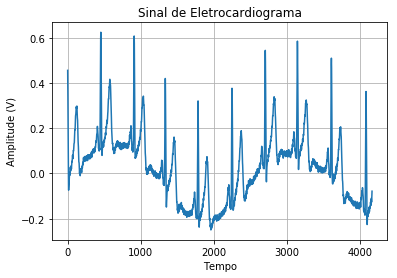

In [6]:
data = []
freq_amostragem = 500
T = 1.0 / freq_amostragem

root = Tk()
ftypes = [('csv file',"*.csv")]
ttl  = "Abrir sinal de entrada"
dir1 = 'C:\\'
root.fileName = askopenfilename(filetypes = ftypes, initialdir = dir1, title = ttl)
print('Abrindo ' + root.fileName + ' ...')

file = open(root.fileName, 'r')
del(root)
for line in file:
    l = line.split(',')
    data.append(float(l[0].replace('\n','')))

N = data.__len__()
n = np.arange(N)  # índice n
file.close()

print('Arquivo de dados carregado com sucesso!!!')

plt.title('Sinal de Eletrocardiograma')
plt.plot(n, data, color='C0')
# Legendas e titulos
plt.xlabel('Tempo')
plt.ylabel('Amplitude (V)')
plt.grid()

plt.show()

In [7]:
# Discrete fourier transform
def dft(x):
    t = []
    N = len(x)
    for k in range(N):
        a = 0
        for n in range(N):
            a += float(x[n])*cmath.exp(-2j*cmath.pi*k*n*(1/N))
        t.append(a)
    return t

In [9]:
tic_fft = timeit.default_timer()
fft_vec = fft(data)
toc_fft = timeit.default_timer()
t_fft = toc_fft - tic_fft

tic_dft = timeit.default_timer()
dft_vec = dft(data)
toc_dft = timeit.default_timer()
t_dft = toc_dft - tic_dft

print('O tempo de execução da DFT foi de ' + str(t_dft) + 's e o tempo de execução da FFT foi de ' + str(t_fft) + 's.')


O tempo de execução da DFT foi de 29.429147844561612s e o tempo de execução da FFT foi de 0.0007274388123903464s.


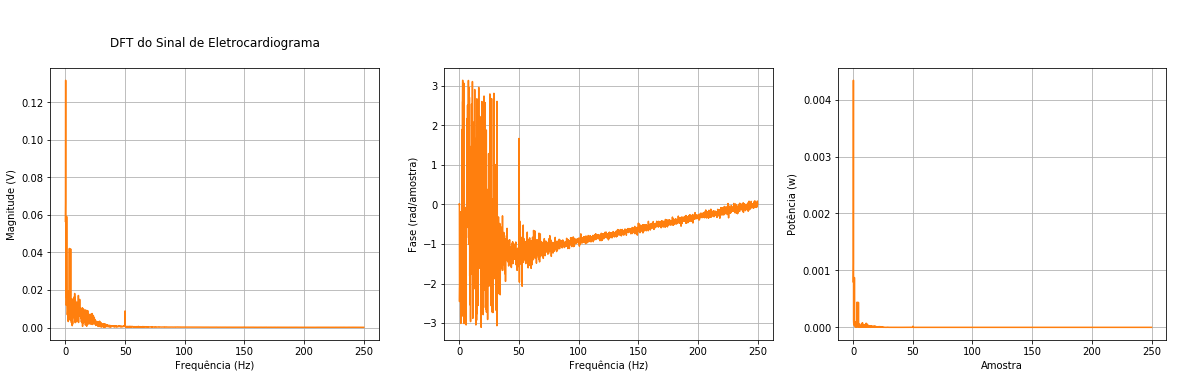

In [10]:
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))


plt.subplot(1,3,1)
plt.title('\n\nDFT do Sinal de Eletrocardiograma\n')
plt.plot(xf, 2/N *(np.abs(dft_vec[:N//2])), color='C1')
# Legendas e titulos
plt.xlabel('Frequência (Hz)\n')
plt.ylabel('Magnitude (V)')
plt.grid()

plt.subplot(1,3,2)
plt.plot(xf, np.angle(dft_vec[:N//2]), color='C1')
# Legendas e titulos
plt.xlabel('Frequência (Hz)\n')
plt.ylabel('Fase (rad/amostra)')
plt.grid()

potencia_dft = (1/N**2)*(np.abs(dft_vec))**2

plt.subplot(1,3,3)
plt.plot(xf, potencia_dft[:N//2], color='C1')
# Legendas e titulos
plt.xlabel('Amostra')
plt.ylabel('Potência (w)')
plt.grid()

plt.show() 

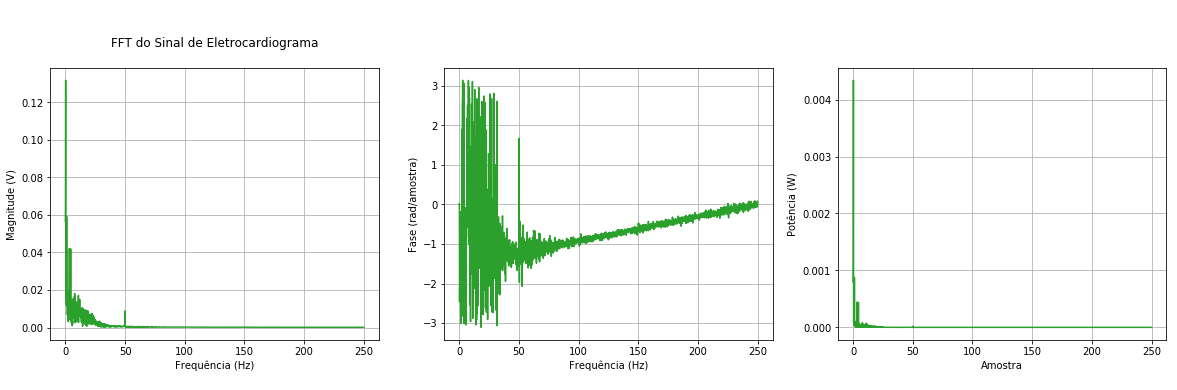

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))


plt.subplot(1,3,1)
plt.title('\n\nFFT do Sinal de Eletrocardiograma\n')
plt.plot(xf, 2/N *(np.abs(fft_vec[:N//2])), color='C2')
# Legendas e titulos
plt.xlabel('Frequência (Hz)\n')
plt.ylabel('Magnitude (V)')
plt.grid()

plt.subplot(1,3,2)
plt.plot(xf, np.angle(fft_vec[:N//2]), color='C2')
# Legendas e titulos
plt.xlabel('Frequência (Hz)\n')
plt.ylabel('Fase (rad/amostra)')
plt.grid()

potencia_fft = (1/N**2)*(np.abs(fft_vec))**2

plt.subplot(1,3,3)
plt.plot(xf, potencia_fft[:N//2], color='C2')
# Legendas e titulos
plt.xlabel('Amostra')
plt.ylabel('Potência (W)')
plt.grid()

plt.show() 

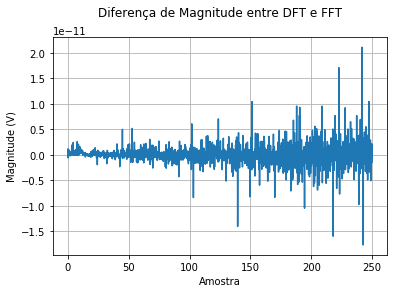

In [12]:
dif = np.abs(dft_vec) - np.abs(fft_vec)

plt.title('Diferença de Magnitude entre DFT e FFT\n')
plt.plot(xf, dif[:N//2], color='C0')
# Legendas e titulos
plt.xlabel('Amostra')
plt.ylabel('Magnitude (V)')
plt.grid()
plt.show()